In [1]:

###Import the liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For creating model and train test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

# suppress warnings
import warnings
warnings.filterwarnings("ignore")


   ## Start reading the file TRAIN.csv

In [2]:
hp_df = pd.read_csv("D:\Python\git\house/train.csv")
hp_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


    ## Check the Datatype and columns

In [3]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
hp_df.shape

(1460, 81)

In [5]:
hp_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


 ## Check for missing Values use the standard function

In [6]:
hp_df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [7]:
## Standard func which we used in other prog.
def columns_with_missing_values():
    total = hp_df.isnull().sum().sort_values(ascending=False)
    percent = round(hp_df.isnull().sum()*100/len(hp_df), 2).sort_values(ascending=False)
    
    all_features = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    all_features = all_features[all_features.Total != 0]
    
    if len(all_features) == 0:
        return 'No Column with Missing Values.'
    return all_features
   
columns_with_missing_values()

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


## Based on Meta data we find some relevant columns

In [8]:

main_column = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageType", 
          "GarageFinish", "GarageQual", "BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtFinType1",
          "BsmtCond", "MasVnrType"]

In [9]:
## Fill bland with None
for column in main_column:
    before = hp_df[column].isnull().sum()
    hp_df[column].fillna("None", inplace=True)
    print(before, "missing values of", column ,"imputed.")


columns_with_missing_values()

1453 missing values of PoolQC imputed.
1406 missing values of MiscFeature imputed.
1369 missing values of Alley imputed.
1179 missing values of Fence imputed.
690 missing values of FireplaceQu imputed.
81 missing values of GarageCond imputed.
81 missing values of GarageType imputed.
81 missing values of GarageFinish imputed.
81 missing values of GarageQual imputed.
38 missing values of BsmtFinType2 imputed.
38 missing values of BsmtExposure imputed.
37 missing values of BsmtQual imputed.
37 missing values of BsmtFinType1 imputed.
37 missing values of BsmtCond imputed.
8 missing values of MasVnrType imputed.


,Total,Percent
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55
Electrical,1,0.07


## Based on meta data below some columns are null having meaningful data will convert value by mean or median

In [10]:

dummy_data_replacement = ["GarageYrBlt", "MasVnrArea"]

for column in dummy_data_replacement:
    before = hp_df[column].isnull().sum()
    hp_df[column].fillna(hp_df[column].median(), inplace=True)
    print(before, "missing values of", column ,"imputed.")


columns_with_missing_values()



81 missing values of GarageYrBlt imputed.
8 missing values of MasVnrArea imputed.


,Total,Percent
LotFrontage,259,17.74
Electrical,1,0.07


## With meta data description dont think this is required so remove it also having so many nulls 
## LotFrontage: Linear feet of street connected to property
## Electrical system looks not valueadded

In [11]:
hp_df.drop(columns=["LotFrontage"], inplace=True)
hp_df.drop(columns=["Electrical"], inplace=True)

columns_with_missing_values()


'No Column with Missing Values.'

#### Separating Numarical value for analysis

In [12]:

numeric_data_df = hp_df.select_dtypes(include=['float64', 'int64'])
print("Shape :", hp_df.shape)

hp_df.head()

Shape : (1460, 79)


,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


## Similar to above seperate all the categorial values for Analysis

In [13]:

cat_data_df = hp_df.select_dtypes(exclude=['float64', 'int64'])

print("Shape", hp_df.shape)

hp_df.head()

Shape (1460, 79)


,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [14]:
##ID column is of no use just a seq number

numeric_data_df.drop(columns=["Id"], inplace=True)
sale_price_column = "SalePrice"

### Create a heatmap for analysis and then plot the grahs for analysis

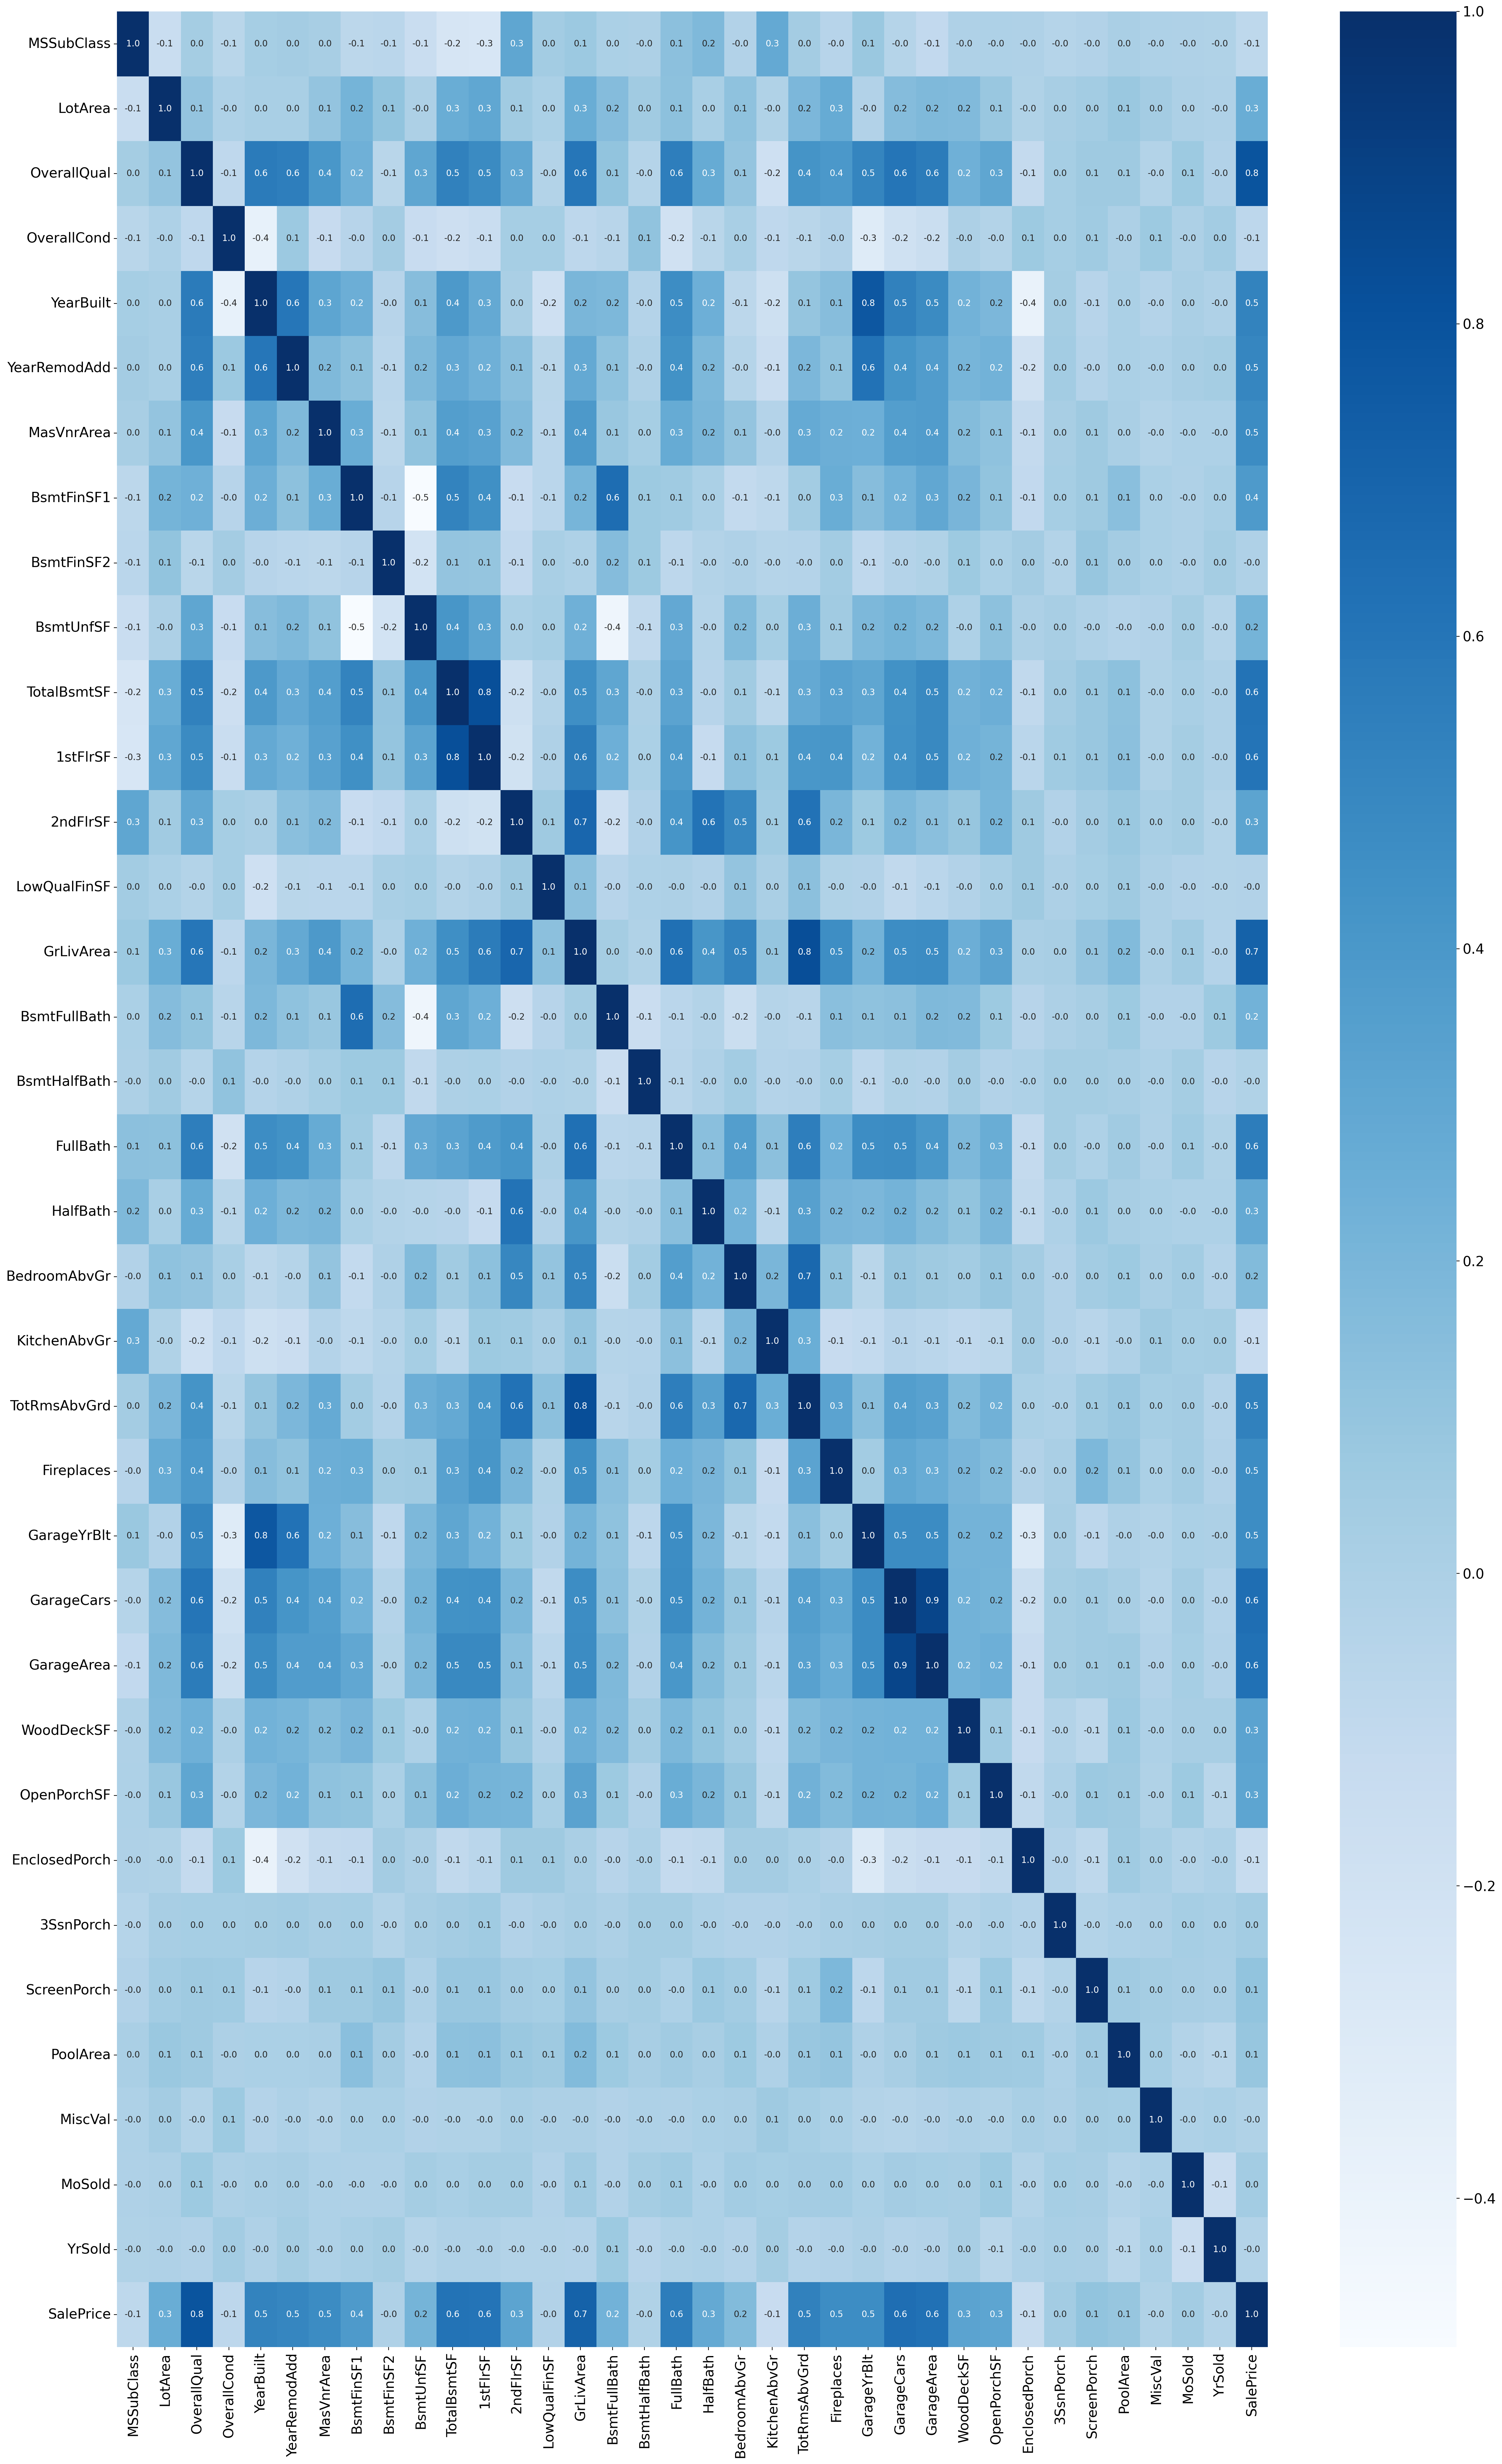

In [15]:
fig = plt.figure(figsize=(30,50),dpi=200)

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

sns.heatmap(numeric_data_df.corr(), annot = True, cmap="Blues",fmt='.1f')
plt.show()

### Create the plot for all the relivant numaric data 

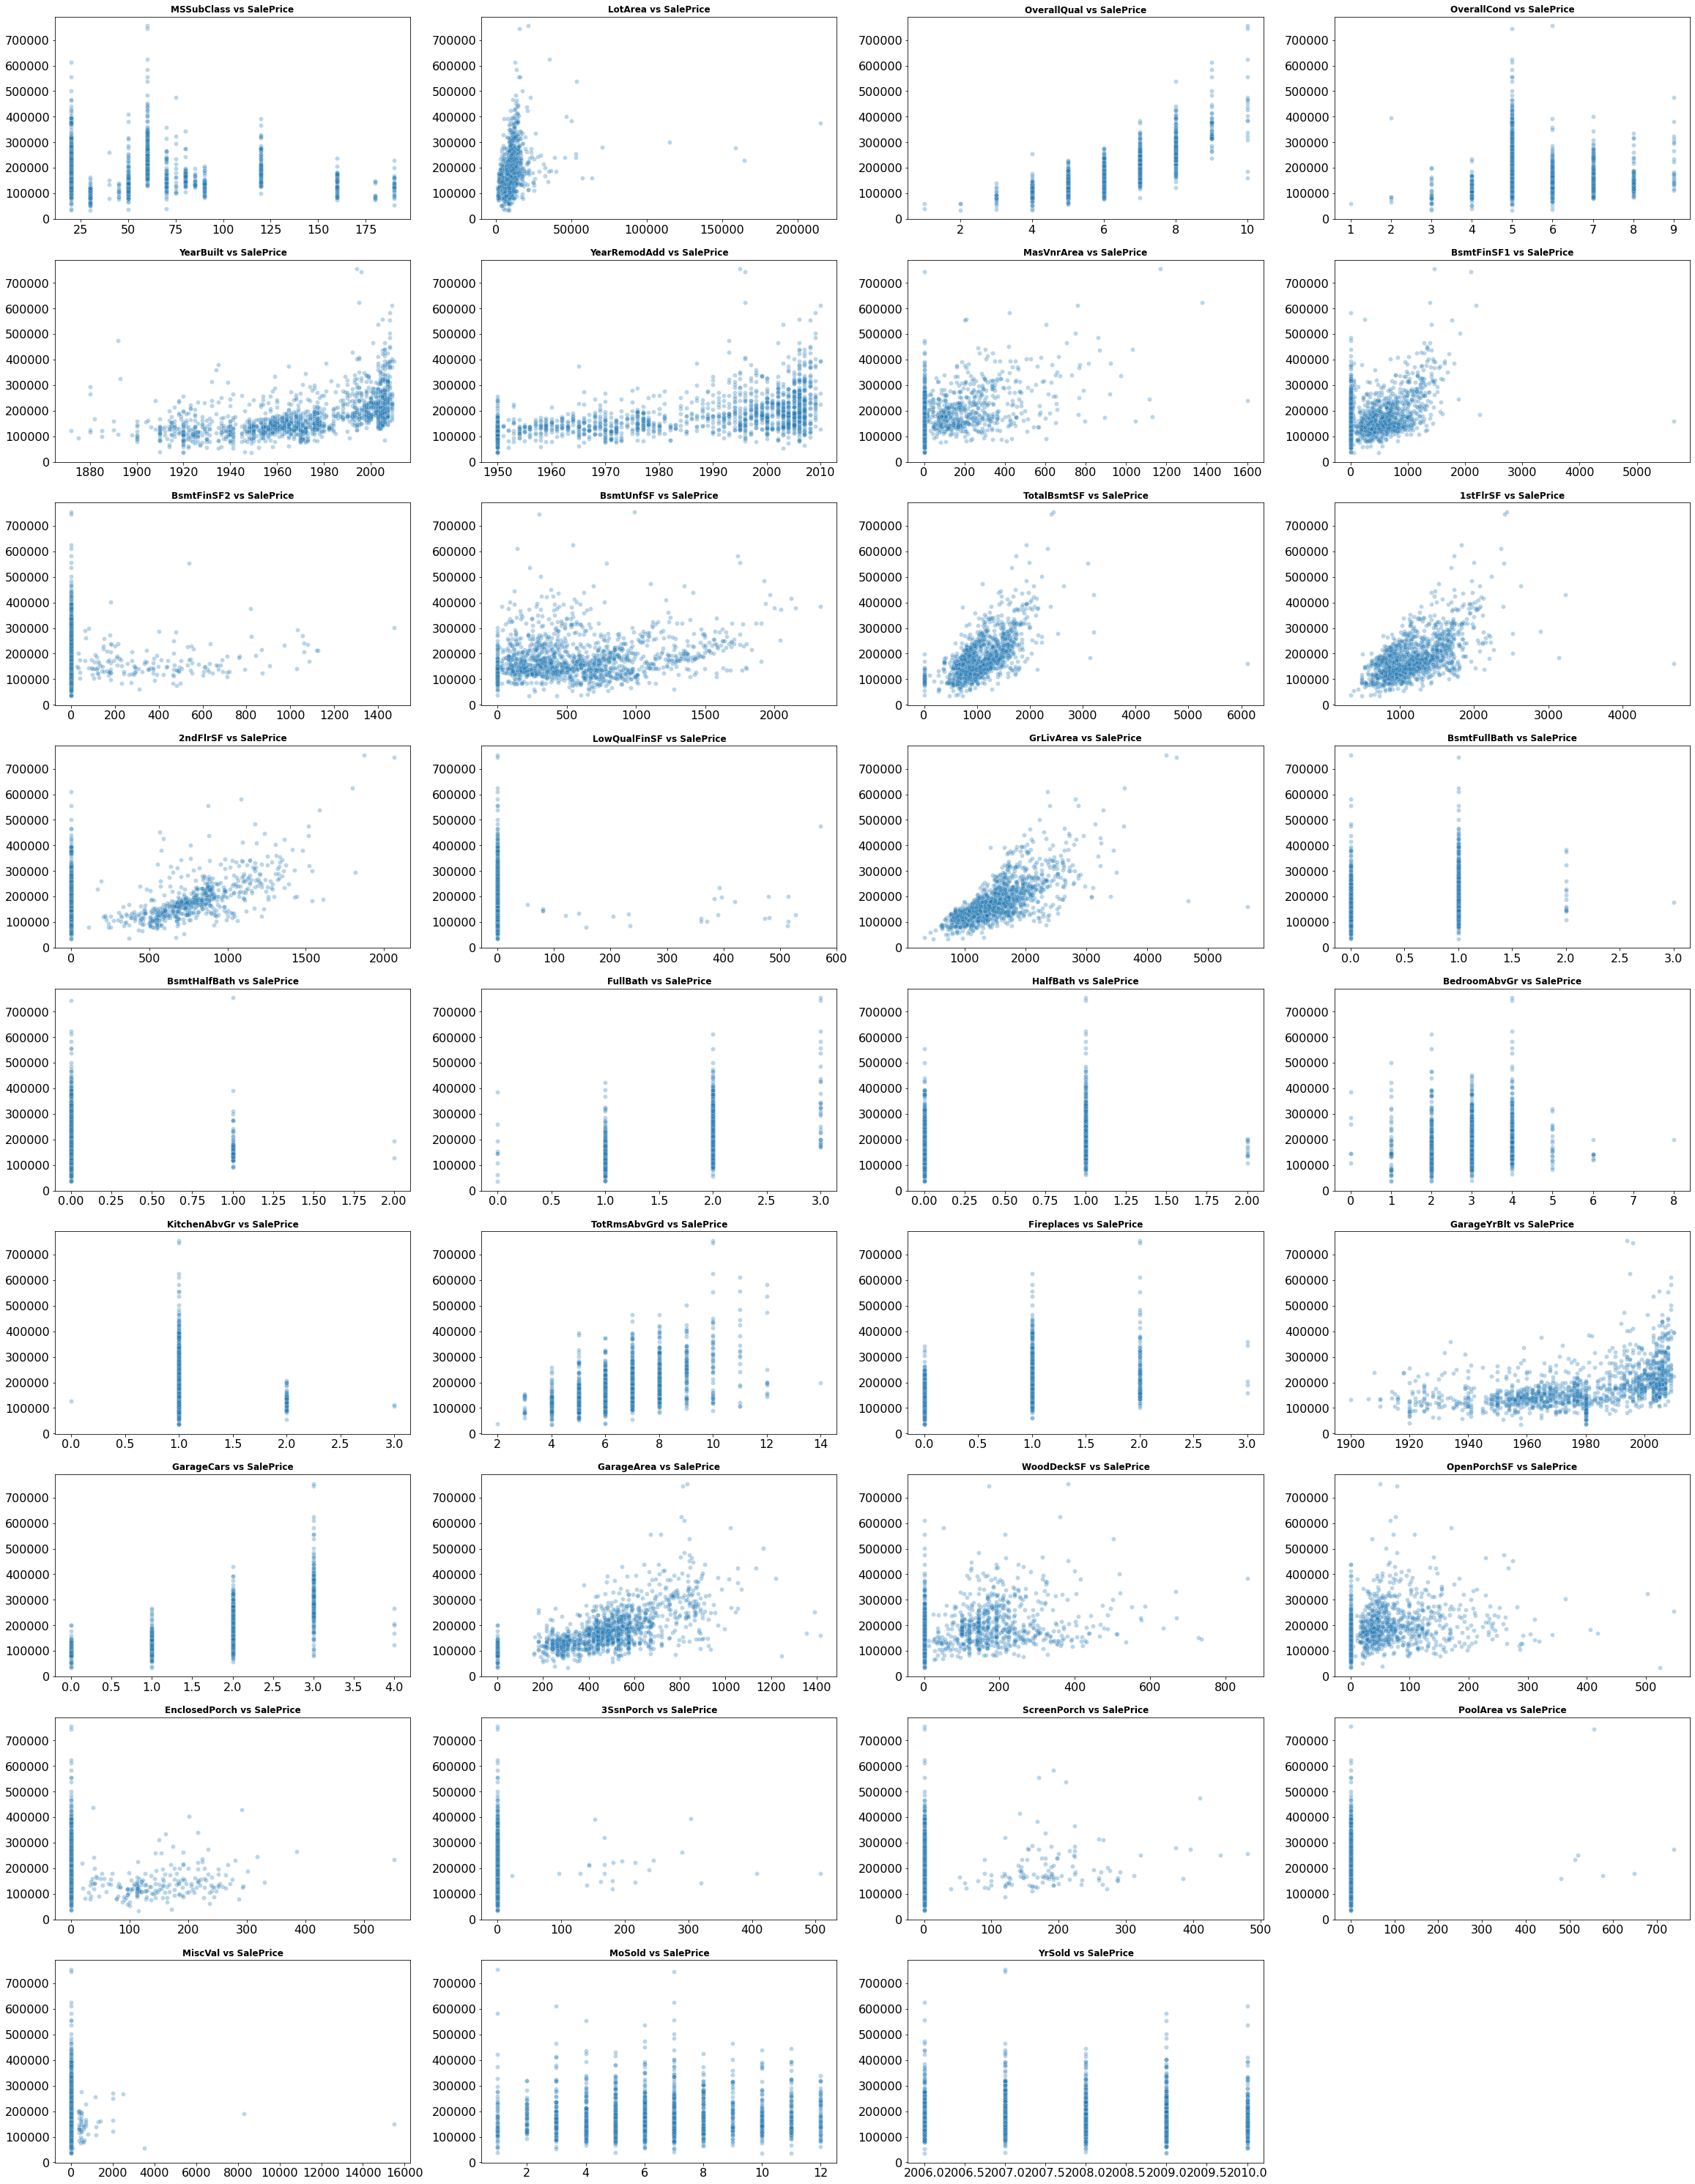

In [16]:
# Numerical column data analysis
plt.figure(figsize=(40, 60))

count = 1

for column in numeric_data_df.columns:
    if column != sale_price_column:
        plt.subplot(10, 4, count)
        sns.scatterplot(hp_df[column], hp_df[sale_price_column], alpha = 0.3).set(ylabel=None, xlabel=None)
        plt.title(column + " vs " + sale_price_column, weight='bold')
        count += 1
    
plt.show()

## Similar to above do the nanalysis for Categorial columns

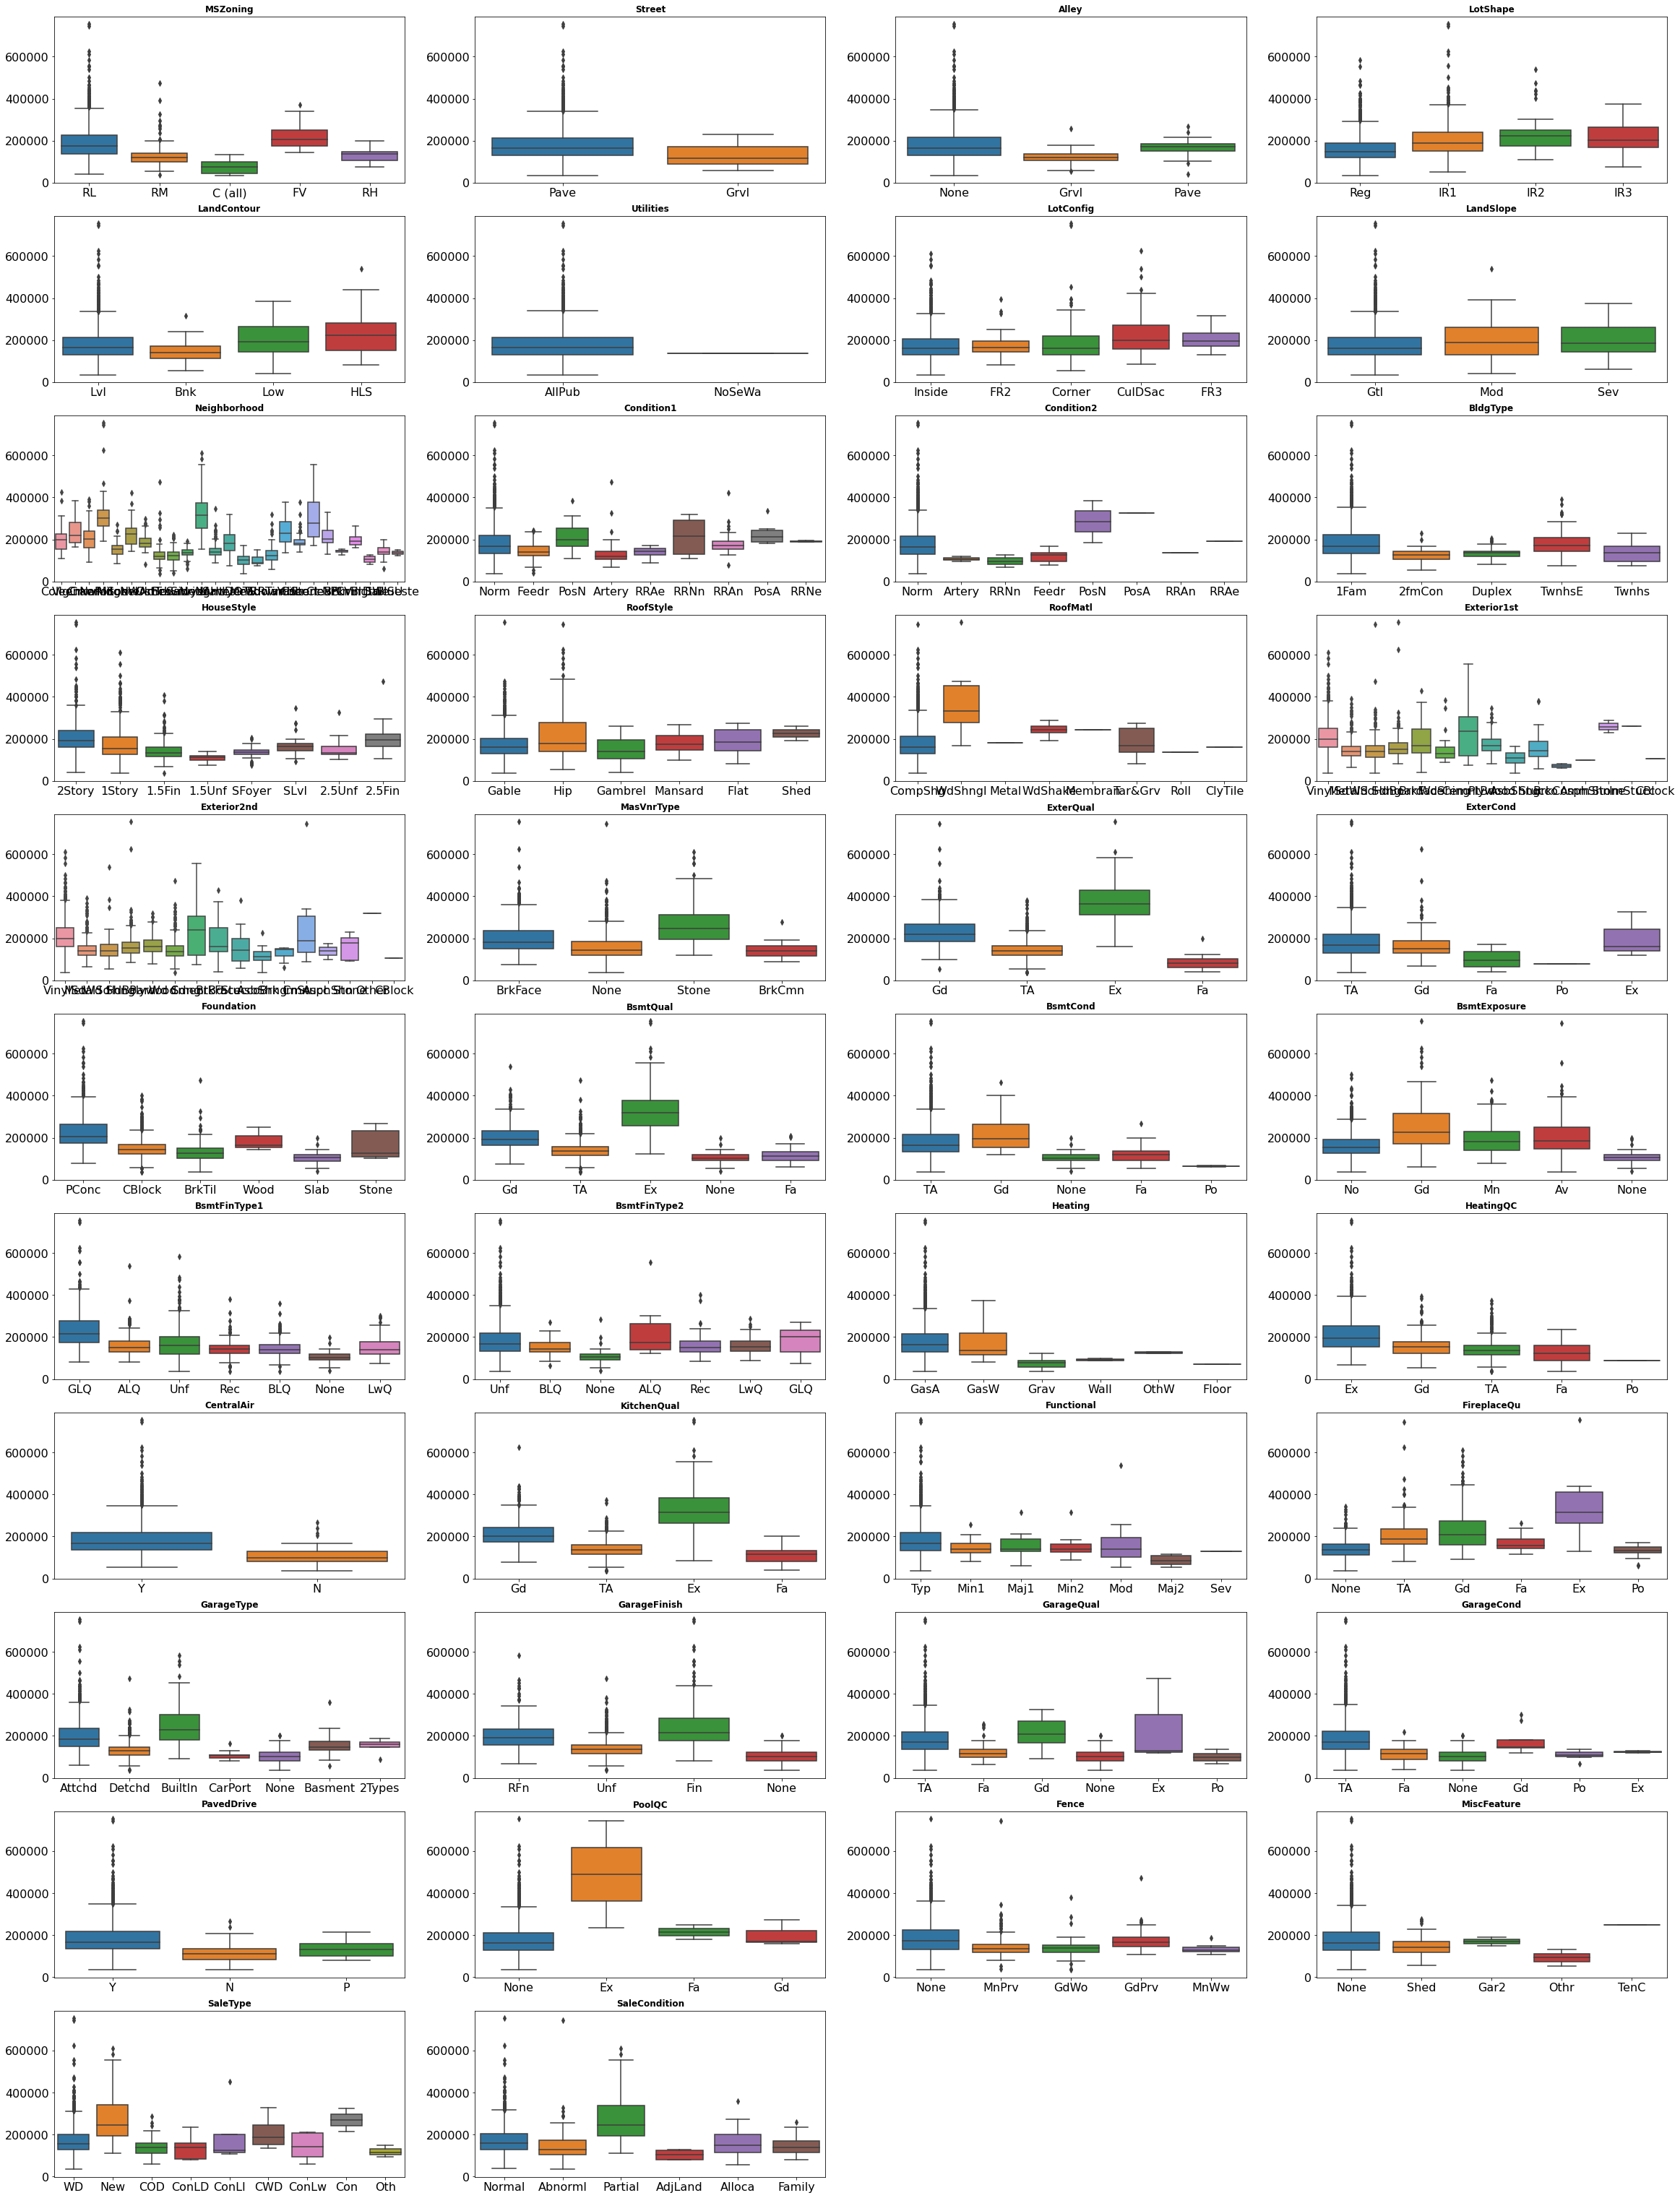

In [17]:
plt.figure(figsize=(40, 55))

count = 1

for column in cat_data_df.columns:
    if column != sale_price_column:
        plt.subplot(11, 4, count)
        sns.boxplot(x=hp_df[column], y=hp_df[sale_price_column]).set(ylabel=None, xlabel=None)
        plt.title(column, weight='bold')
        count += 1
    
plt.show()

In [18]:
converted_sale_price_column = "ConvertedSalePrice"

numeric_data_df[converted_sale_price_column] = np.log(numeric_data_df[sale_price_column])
numeric_data_df[[sale_price_column, converted_sale_price_column]].head()

,SalePrice,ConvertedSalePrice
0,208500,12.247694
1,181500,12.109011
2,223500,12.317167
3,140000,11.849398
4,250000,12.429216


In [19]:
# Creating dummy variables for categorical variables
dummy_df = pd.get_dummies(cat_data_df, drop_first=True)
print("Shape", dummy_df.shape)

dummy_df.head()

Shape (1460, 219)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## Create a final dataset by concatinating numaric and Categorial values

In [27]:
hp_df=pd.concat([numeric_data_df, dummy_df],axis=1)
hp_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


### Scaling the Numerical columns 

In [28]:
scaler = StandardScaler()

cols = list(hp_df.columns.values)
cols.remove(sale_price_column)
cols.remove(converted_sale_price_column)

hp_df[cols] = scaler.fit_transform(hp_df[cols])
hp_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


### Start Model Building

In [29]:
X = hp_df.drop([sale_price_column, converted_sale_price_column], axis=1).values
y = hp_df[converted_sale_price_column].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

### Lasso Regression

In [30]:
lasso = Lasso()


folds = 5
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error', 
                        cv = folds, return_train_score=True, verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [31]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['params', 'mean_train_score', 'mean_test_score']].head()

,params,mean_train_score,mean_test_score
0,{'alpha': 0.0001},-0.060265,-0.095877
1,{'alpha': 0.001},-0.064576,-0.092731
2,{'alpha': 0.01},-0.085274,-0.098723
3,{'alpha': 0.05},-0.125547,-0.129653
4,{'alpha': 0.1},-0.164081,-0.165682


### plotting mean test and train scoes with alpha

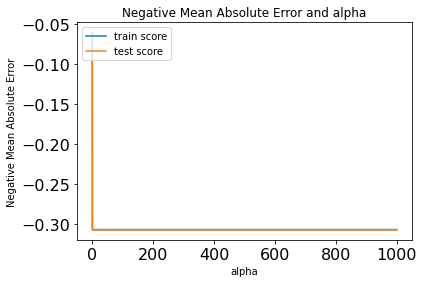

In [32]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Check Best Alpha Value

In [33]:
model_cv.best_params_

{'alpha': 0.001}

In [34]:
# Run the Lasso Model for best param
lasso = Lasso(alpha=model_cv.best_params_['alpha'])
lasso.fit(X_train, y_train)

y_pred_lasso_train=lasso.predict(X_train)
print('Train R2 Square : ', round(r2_score(y_train, y_pred_lasso_train),2))

y_pred_lasso_test=lasso.predict(X_test)
print('Test R2 Square : ', round(r2_score(y_test, y_pred_lasso_test),2))

Train R2 Square :  0.94
Test R2 Square :  0.87


### Check the parameters

In [36]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = hp_df.columns
cols = cols.insert(0, "constant")
var_coeff = [x for x in list(zip(cols, model_parameters)) if abs(x[-1] != 0)]
lasso_params = pd.DataFrame({'Feature':list(list(zip(*var_coeff))[0]),'Coeff':list(list(zip(*var_coeff))[1])})
lasso_params.reindex(lasso_params.Coeff.abs().sort_values(ascending = False).index)

,Feature,Coeff
0,constant,12.026
26,PoolArea,0.221
157,PoolQC_Fa,0.196
12,GrLivArea,0.106
3,OverallQual,0.071
...,...,...
125,BsmtFinType1_Unf,0.001
131,HeatingQC_Fa,-0.001
142,FireplaceQu_Gd,0.001
148,GarageFinish_Unf,0.001


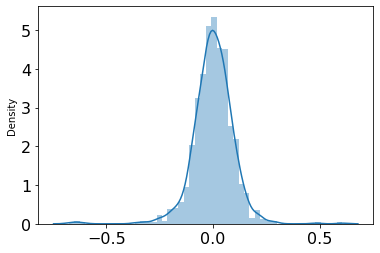

In [37]:
sns.distplot((y_train-y_pred_lasso_train))
plt.show()

In [38]:
# Applying Ridge
ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', 
                        cv = folds, return_train_score=True, verbose = 1)    

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [39]:
# CV results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['params', 'mean_train_score', 'mean_test_score']].head()

,params,mean_train_score,mean_test_score
0,{'alpha': 0.0001},-0.059855,-0.096441
1,{'alpha': 0.001},-0.059856,-0.096446
2,{'alpha': 0.01},-0.059861,-0.096498
3,{'alpha': 0.05},-0.059882,-0.096662
4,{'alpha': 0.1},-0.059903,-0.096775


In [41]:
# Best alpha value
model_cv.best_params_

{'alpha': 100}

### Plotting test and train scores with alpha 

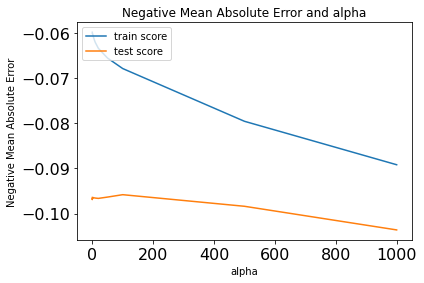

In [40]:

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Ridge model for best param and model parameters

In [42]:
ridge = Ridge(alpha=model_cv.best_params_['alpha'])
ridge.fit(X_train, y_train)

y_pred_ridge_train=ridge.predict(X_train)
print('Train R2 Square : ', round(r2_score(y_train, y_pred_ridge_train),2))

y_pred_ridge_test=ridge.predict(X_test)
print('Test R2 Square : ', round(r2_score(y_test, y_pred_ridge_test),2))

Train R2 Square :  0.93
Test R2 Square :  0.88


In [43]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = hp_df.columns
cols = cols.insert(0, "constant")
var_coeff = [x for x in list(zip(cols, model_parameters)) if abs(x[-1] != 0)]
ridge_params = pd.DataFrame({'Feature':list(list(zip(*var_coeff))[0]),'Coeff':list(list(zip(*var_coeff))[1])})
ridge_params.reindex(ridge_params.Coeff.abs().sort_values(ascending = False).index)

,Feature,Coeff
0,constant,12.025
3,OverallQual,0.058
15,GrLivArea,0.042
220,PavedDrive_Y,-0.039
4,OverallCond,0.033
...,...,...
45,LotShape_IR2,-0.001
184,Heating_OthW,-0.001
182,Heating_GasW,-0.001
105,HouseStyle_SLvl,0.001


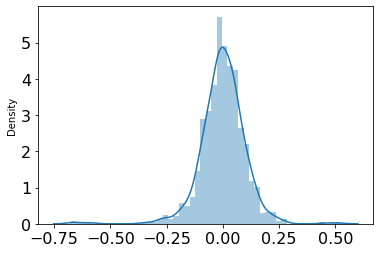

In [44]:
sns.distplot((y_train-y_pred_ridge_train))
plt.show()

In [48]:
# Significant variables which predict price of house when used ridge
ridge_coef.sort_values(by = 'Coef',ascending = False).head(10)

,Feaure,Coef
0,MSSubClass,12.025291
3,OverallCond,0.058197
15,BsmtFullBath,0.041541
4,YearBuilt,0.032580
12,2ndFlrSF,0.027838
5,YearRemodAdd,0.027404
25,GarageArea,0.026610
13,LowQualFinSF,0.024691
22,Fireplaces,0.024382
251,SaleCondition_AdjLand,0.023878


## Conclusion

### The optimal value of lambda for ridge and lasso regression are :

#### Best alpha value for Lasso : 0.001

#### Best alpha value for Ridge : 100.0

### These variables are significant in predicting the price of a house :


##### OverallCond : Which Rates the overall condition of the house


##### BsmtFullBath : Which denotes Basement full bathrooms

##### YearBuilt : Signifies Original construction date

